<a href="https://colab.research.google.com/github/gisela1985/ML_models_practice/blob/main/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Regressor - Exercise
data source: Kaggel

# Libraries

In [ ]:
#import libraries
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Goal

In [ ]:
# The goal is to predict the price of real estate using the following features:
# LotArea, YearBuilt, 1stFlrSF, 2ndFlrSF, FullBath, BedroomAbvGr, and TotRmsAbvGrd.

# Import data

In [ ]:
#define the path where the datasets are
drive_data_path = '/content/drive/MyDrive/ML - Kaggle practice/Data/'

In [ ]:
# Read the data
X_full = pd.read_csv(drive_data_path+'train.csv', index_col='Id')
X_test_full = pd.read_csv(drive_data_path+'test.csv', index_col='Id')

# Obtain target and predictors
y = X_full.SalePrice

#reduce el scope to this features
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# EDA

In [ ]:
#classify columns into categorical and quantitative variables
#define the function
def check_variables(df: pd.DataFrame):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

In [ ]:
#call the function and the save the result into a variable

X_fatures_and_target = X_full[features + ['SalePrice']].copy()


df = X_fatures_and_target
cat_cols, quan_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: []
quantitative columns: ['BedroomAbvGr', '2ndFlrSF', 'SalePrice', 'FullBath', 'LotArea', 'TotRmsAbvGrd', '1stFlrSF', 'YearBuilt']


## Functions


In [ ]:
def summarize_by_category(df, category_col, target_col):
    """
    Summarize a categorical variable with counts, percentages,
    and the average of a target numeric variable.

    Parameters:
    - df: pandas DataFrame
    - category_col: str, name of the categorical column (e.g. 'FullBath')
    - target_col: str, name of the numeric target column (e.g. 'SalePrice')

    Returns:
    - DataFrame with category, count, percentage, and average target value
    """

    # Count and percentage
    summary_df = df[category_col].value_counts().reset_index()
    summary_df.columns = [category_col, 'Count']
    summary_df['percentage'] = round(100 * summary_df['Count'] / summary_df['Count'].sum(), 2)

    # Average of target variable
    avg_target = df.groupby(category_col)[target_col].mean().reset_index()
    avg_target.columns = [category_col, f'Avg_{target_col}']

    # Merge summaries
    summary_df = summary_df.merge(avg_target, on=category_col)
    summary_df[f'Avg_{target_col}'] = summary_df[f'Avg_{target_col}'].round(2)

    return summary_df


In [ ]:
def plot_horizontal_bar(
    df, x_col, y_col,
    xlabel='', ylabel='', title='',
    bar_color='mediumseagreen',
    value_suffix='%',  # suffix to show next to bar values, e.g. '%', '', '$'
    value_offset=0.5,  # horizontal offset for values from the bar end
    figsize=(8,6)
):
    """
    Plot a horizontal bar chart with values annotated on bars and integer y-axis ticks.

    Parameters:
    - df: DataFrame containing the data
    - x_col: column name for y-axis categories (bars)
    - y_col: column name for x-axis values (bar lengths)
    - xlabel, ylabel, title: axis labels and title
    - bar_color: color of the bars
    - value_suffix: suffix to add to annotated values
    - value_offset: horizontal distance between bar end and value text
    - figsize: tuple with figure size
    """

    plt.figure(figsize=figsize)
    bars = plt.barh(df[x_col], df[y_col], color=bar_color)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Force y-axis to show integer ticks if y-axis values are numeric
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Add values on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + value_offset,
                 bar.get_y() + bar.get_height() / 2,
                 f'{width:.2f}{value_suffix}',
                 va='center')

    plt.tight_layout()
    plt.show()

In [ ]:
def scater_plot_variables(df, var1, var2):
  plt.figure(figsize=(8, 6))
  plt.scatter(df[var1], df[var2], color='tomato', s=80)

  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.title('Sale Price by Number of Full Bathrooms')
  plt.grid(True, linestyle='--', alpha=0.6)

  plt.tight_layout()
  plt.show()

## FullBath

,FullBath,Count,percentage,Avg_SalePrice
0,2,768,52.60,213009.83
1,1,650,44.52,134751.44
2,3,33,2.26,347822.91
3,0,9,0.62,165200.89


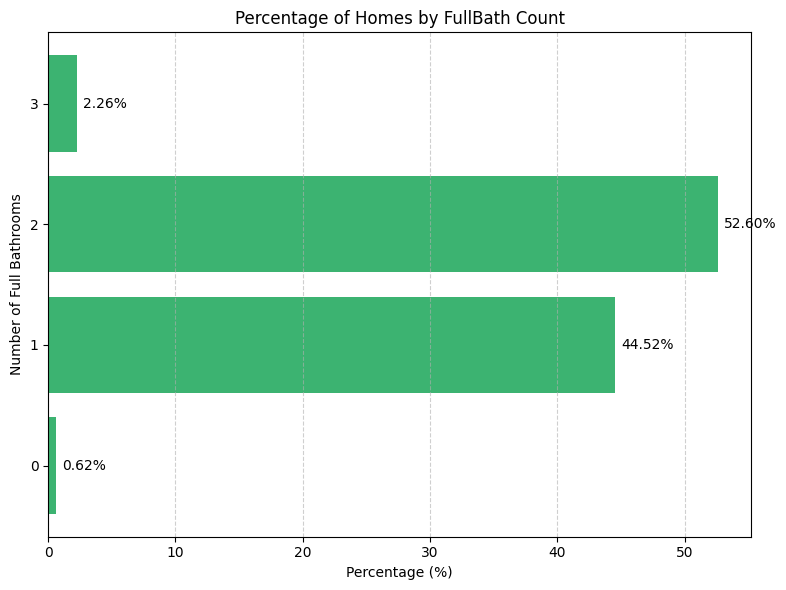

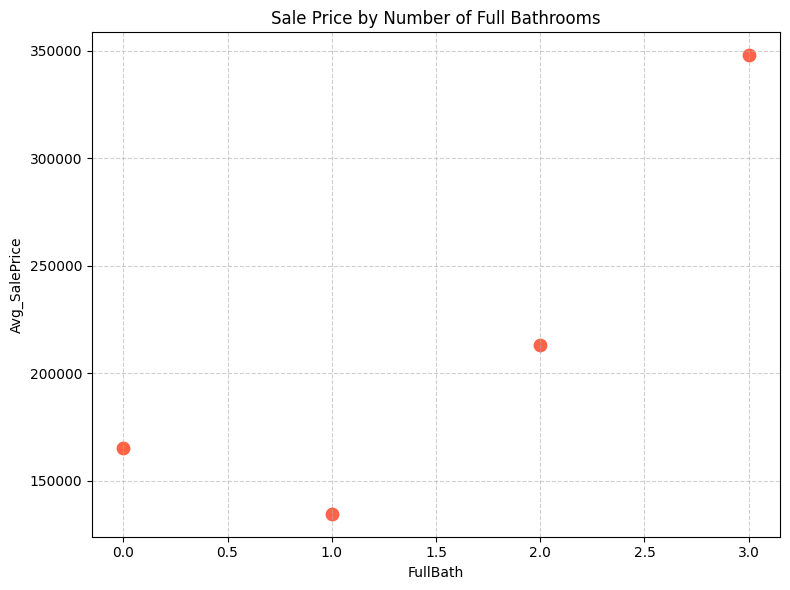

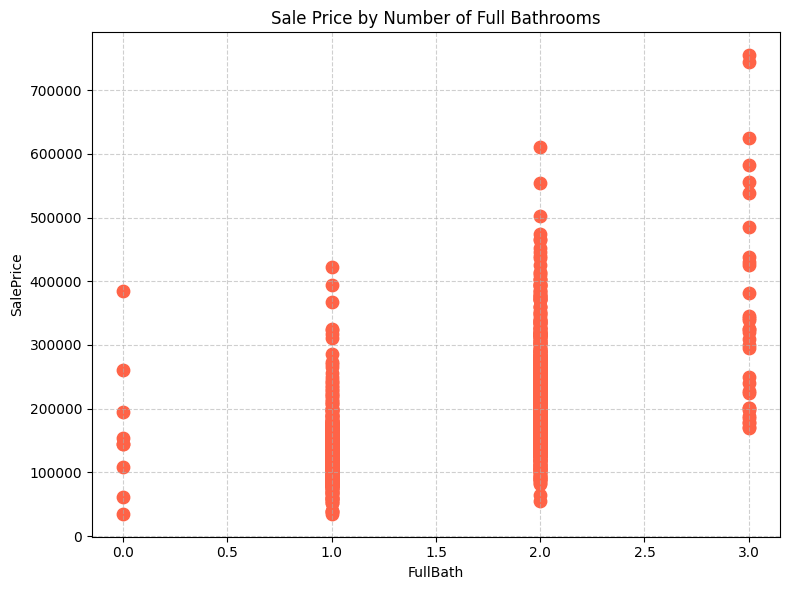

In [ ]:
var_to_analyze = 'FullBath'
target = 'SalePrice'

df_variable = summarize_by_category(df, var_to_analyze, target)
display(df_variable)

plot_horizontal_bar(
    df=df_variable,
    x_col=var_to_analyze,
    y_col='percentage',
    xlabel='Percentage (%)',
    ylabel='Number of Full Bathrooms',
    title='Percentage of Homes by FullBath Count',
    bar_color='mediumseagreen',
    value_suffix='%',
    value_offset=0.5
)

variables = [var_to_analyze, 'Avg_SalePrice']
scater_plot_variables(df_variable, variables[0], variables[1])

variables = [var_to_analyze, target]
scater_plot_variables(df, variables[0], variables[1])

# Model

In [ ]:
# split the data with randomization
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    test_size=0.2,
    shuffle=True,
    random_state=42  # set a seed for reproducibility
)

In [ ]:
#show the head of train and test data
print("Data Train")
display(X_train.head())
print("Data Test")
display(X_test.head())

In [ ]:
#show the head of train and test data
print("Data Train")
display(y_train.head())
print("Data Test")
display(y_test.head())

In [ ]:
#show the shape of the data
print("Data Train - shape")
display(X_train.shape)
print("Data Test - shape")
display(X_test.shape)

In [ ]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

# Model evaluation

In [ ]:
# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

In [ ]:
# Fit the model to the training data
my_model = model_3
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)